c:\Users\bjolnir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6463 - loss: 0.9871 - val_accuracy: 0.5098 - val_loss: 0.7698
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9118 - loss: 0.6081 - val_accuracy: 0.5098 - val_loss: 0.5585
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9160 - loss: 0.3934 - val_accuracy: 0.8627 - val_loss: 0.3464
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9986 - loss: 0.2360 - val_accuracy: 0.9608 - val_loss: 0.2542
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9900 - loss: 0.1497 - val_accuracy: 1.0000 - val_loss: 0.1465
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9973 - loss: 0.1070 - val_accuracy: 1.0000 - val_loss: 0.1151
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0674 - val_accuracy: 1.0000 - val_loss: 0.0602
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0498 - val_accuracy: 1.0000 - val_l

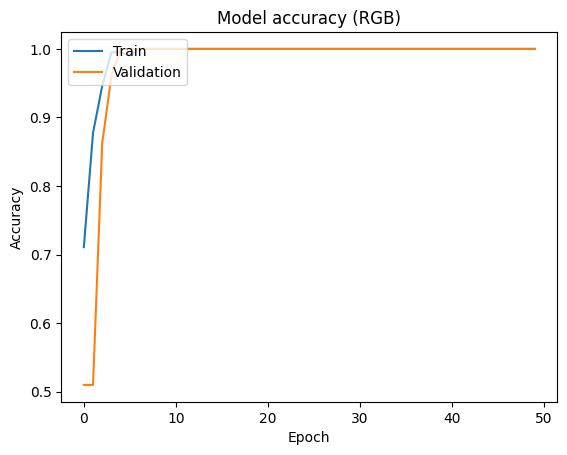

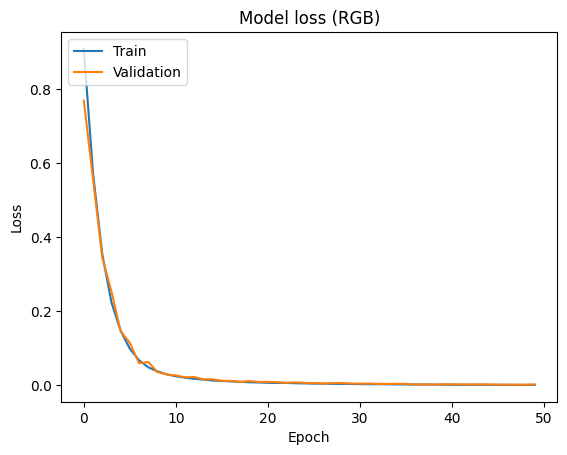

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

      matang       0.94      1.00      0.97        50
     mengkal       0.94      0.94      0.94        50
      mentah       1.00      0.94      0.97        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



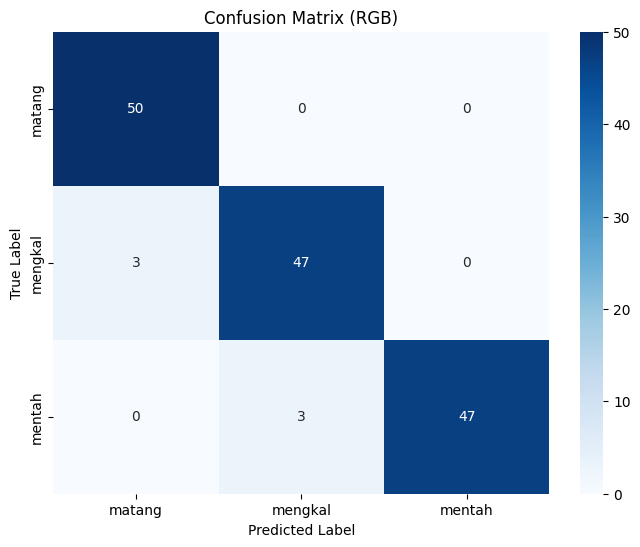

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Memuat data fitur warna RGB untuk pelatihan
train_data_rgb = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_RGB.csv')

# Memuat data fitur warna RGB untuk pengujian
test_data_rgb = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_RGB.csv')

# Memisahkan fitur dan label untuk pelatihan
X_train_rgb = train_data_rgb[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_train_rgb = train_data_rgb['Class']

# Memisahkan fitur dan label untuk pengujian
X_test_rgb = test_data_rgb[['Mean_R', 'Mean_G', 'Mean_B', 'Std_R', 'Std_G', 'Std_B']]
y_test_rgb = test_data_rgb['Class']

# Mengencode label kelas
label_encoder_rgb = LabelEncoder()
y_train_encoded_rgb = label_encoder_rgb.fit_transform(y_train_rgb)
y_test_encoded_rgb = label_encoder_rgb.transform(y_test_rgb)

# Normalisasi fitur
scaler_rgb = StandardScaler()
X_train_scaled_rgb = scaler_rgb.fit_transform(X_train_rgb)
X_test_scaled_rgb = scaler_rgb.transform(X_test_rgb)

# Membangun model ANN
model_rgb = Sequential()
model_rgb.add(Dense(64, input_dim=X_train_scaled_rgb.shape[1], activation='relu'))
model_rgb.add(Dense(64, activation='relu'))
model_rgb.add(Dense(len(label_encoder_rgb.classes_), activation='softmax'))

# Mengompilasi model
model_rgb.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
history_rgb = model_rgb.fit(X_train_scaled_rgb, y_train_encoded_rgb, epochs=50, batch_size=10, validation_split=0.2)

# Mengevaluasi model dengan data uji
loss_rgb, accuracy_rgb = model_rgb.evaluate(X_test_scaled_rgb, y_test_encoded_rgb)
print(f'Accuracy RGB: {accuracy_rgb*100:.2f}%')

# Plotting training & validation accuracy values
plt.plot(history_rgb.history['accuracy'])
plt.plot(history_rgb.history['val_accuracy'])
plt.title('Model accuracy (RGB)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history_rgb.history['loss'])
plt.plot(history_rgb.history['val_loss'])
plt.title('Model loss (RGB)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediksi label untuk data uji
y_pred_rgb = model_rgb.predict(X_test_scaled_rgb)
y_pred_classes_rgb = np.argmax(y_pred_rgb, axis=1)

# Menampilkan classification report
print(classification_report(y_test_encoded_rgb, y_pred_classes_rgb, target_names=label_encoder_rgb.classes_))

# Membuat confusion matrix
conf_matrix_rgb = confusion_matrix(y_test_encoded_rgb, y_pred_classes_rgb)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rgb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_rgb.classes_, yticklabels=label_encoder_rgb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (RGB)')
plt.show()


c:\Users\bjolnir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6489 - loss: 0.9649 - val_accuracy: 0.5098 - val_loss: 0.7723
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7857 - loss: 0.7019 - val_accuracy: 0.5098 - val_loss: 0.7185
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7948 - loss: 0.5930 - val_accuracy: 0.5098 - val_loss: 0.5939
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8803 - loss: 0.3965 - val_accuracy: 0.5098 - val_loss: 0.5870
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8125 - loss: 0.3972 - val_accuracy: 0.5098 - val_loss: 0.4987
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.3310 - val_accuracy: 0.5098 - val_loss: 0.4596
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8757 - loss: 0.2789 - val_accuracy: 0.6863 - val_loss: 0.4025
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8813 - loss: 0.2833 - val_accuracy: 0.7451 - val_loss

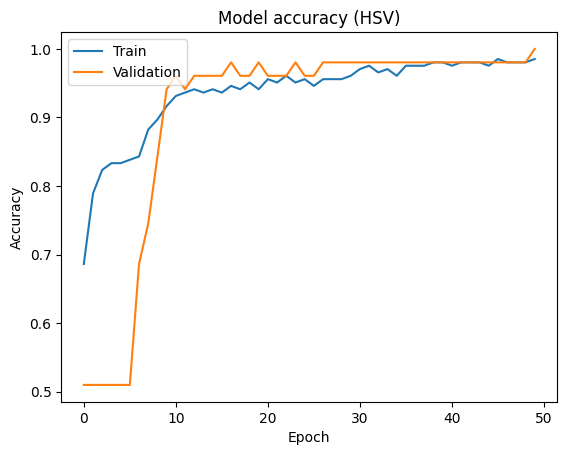

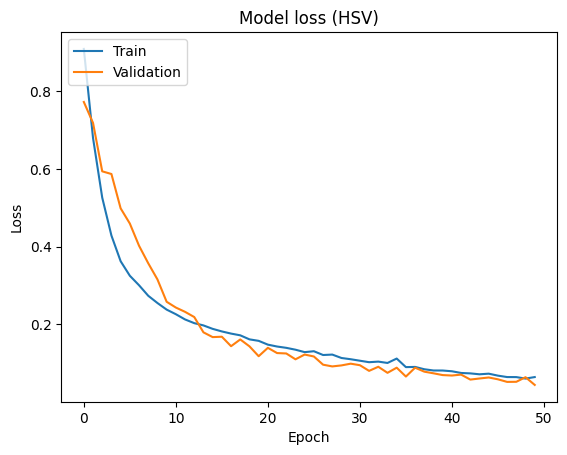

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EAAF4C96C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

      matang       0.45      1.00      0.62        50
     mengkal       0.95      0.72      0.82        50
      mentah       1.00      0.02 

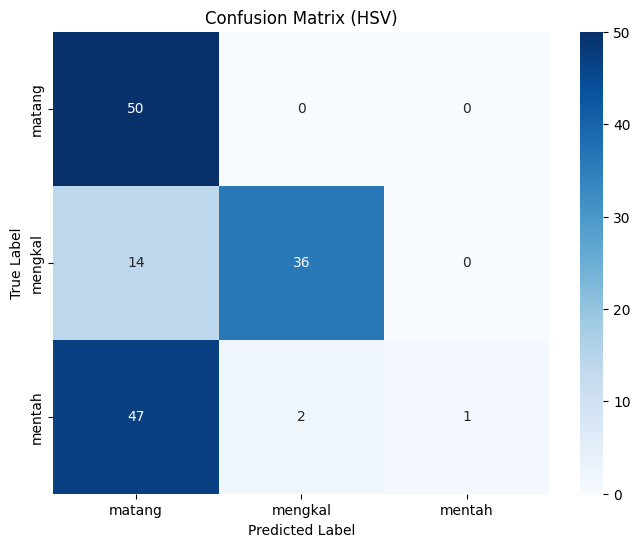

In [3]:
# Memuat data fitur warna HSV untuk pelatihan
train_data_hsv = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_HSV.csv')

# Memuat data fitur warna HSV untuk pengujian
test_data_hsv = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_HSV.csv')

# Memisahkan fitur dan label untuk pelatihan
X_train_hsv = train_data_hsv[['Mean_H', 'Mean_S', 'Mean_V', 'Std_H', 'Std_S', 'Std_V']]
y_train_hsv = train_data_hsv['Class']

# Memisahkan fitur dan label untuk pengujian
X_test_hsv = test_data_hsv[['Mean_H', 'Mean_S', 'Mean_V', 'Std_H', 'Std_S', 'Std_V']]
y_test_hsv = test_data_hsv['Class']

# Mengencode label kelas
label_encoder_hsv = LabelEncoder()
y_train_encoded_hsv = label_encoder_hsv.fit_transform(y_train_hsv)
y_test_encoded_hsv = label_encoder_hsv.transform(y_test_hsv)

# Normalisasi fitur
scaler_hsv = StandardScaler()
X_train_scaled_hsv = scaler_hsv.fit_transform(X_train_hsv)
X_test_scaled_hsv = scaler_hsv.transform(X_test_hsv)

# Membangun model ANN
model_hsv = Sequential()
model_hsv.add(Dense(64, input_dim=X_train_scaled_hsv.shape[1], activation='relu'))
model_hsv.add(Dense(64, activation='relu'))
model_hsv.add(Dense(len(label_encoder_hsv.classes_), activation='softmax'))

# Mengompilasi model
model_hsv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
history_hsv = model_hsv.fit(X_train_scaled_hsv, y_train_encoded_hsv, epochs=50, batch_size=10, validation_split=0.2)

# Mengevaluasi model dengan data uji
loss_hsv, accuracy_hsv = model_hsv.evaluate(X_test_scaled_hsv, y_test_encoded_hsv)
print(f'Accuracy HSV: {accuracy_hsv*100:.2f}%')

# Plotting training & validation accuracy values
plt.plot(history_hsv.history['accuracy'])
plt.plot(history_hsv.history['val_accuracy'])
plt.title('Model accuracy (HSV)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history_hsv.history['loss'])
plt.plot(history_hsv.history['val_loss'])
plt.title('Model loss (HSV)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediksi label untuk data uji
y_pred_hsv = model_hsv.predict(X_test_scaled_hsv)
y_pred_classes_hsv = np.argmax(y_pred_hsv, axis=1)

# Menampilkan classification report
print(classification_report(y_test_encoded_hsv, y_pred_classes_hsv, target_names=label_encoder_hsv.classes_))

# Membuat confusion matrix
conf_matrix_hsv = confusion_matrix(y_test_encoded_hsv, y_pred_classes_hsv)

# Menampilkan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hsv, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_hsv.classes_, yticklabels=label_encoder_hsv.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (HSV)')
plt.show()


In [4]:
!pip install keras-tuner -q

import kerastuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_dim=X_train_scaled_hsv.shape[1]))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dense(len(label_encoder_hsv.classes_), activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

tuner.search(X_train_scaled_hsv, y_train_encoded_hsv, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The best number of units in the first densely-connected layer is {best_hps.get('units')} and the best learning rate for the optimizer is {best_hps.get('learning_rate')}.")

model_hsv = tuner.hypermodel.build(best_hps)
history_hsv = model_hsv.fit(X_train_scaled_hsv, y_train_encoded_hsv, epochs=50, validation_split=0.2)


Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.9803921580314636

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 07s
The best number of units in the first densely-connected layer is 32 and the best learning rate for the optimizer is 0.01.
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5814 - loss: 0.7415 - val_accuracy: 0.8627 - val_loss: 0.3081
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9216 - loss: 0.2007 - val_accuracy: 1.0000 - val_loss: 0.0248
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8843 - loss: 0.3095 - val_accuracy: 0.9608 - val_loss: 0.0910
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8781 - loss: 0.3007 - val_accuracy: 0.5294 - val_loss: 0.8798
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9212 - loss: 0.2088 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9225 - loss: 0.1796 - val_accuracy: 1.0000 - val_loss: 0.0492


Trial 30 Complete [00h 00m 06s]
val_accuracy: 0.5098039507865906

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 19s
The best number of units in the first densely-connected layer is 160 and the best learning rate for the optimizer is 0.01.
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5811 - loss: 0.8579 - val_accuracy: 0.7843 - val_loss: 0.3414
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8206 - loss: 0.3609 - val_accuracy: 1.0000 - val_loss: 0.0881
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8646 - loss: 0.3030 - val_accuracy: 0.7255 - val_loss: 0.4213
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9124 - loss: 0.2563 - val_accuracy: 0.9804 - val_loss: 0.1099
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9352 - loss: 0.2191 - val_accuracy: 0.9608 - val_loss: 0.1234
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9226 - loss: 0.2264 - val_accuracy: 0.9216 - val_loss: 0.2076
Epo

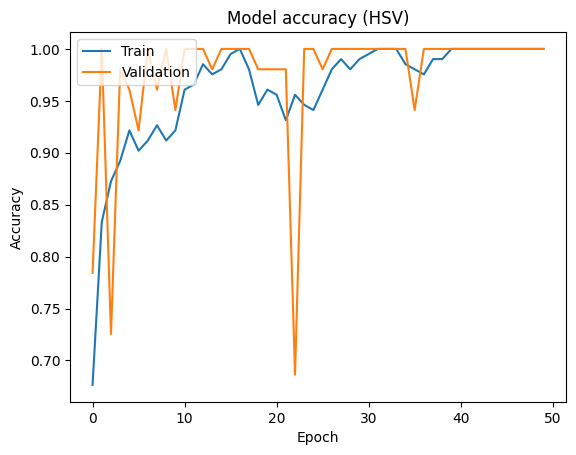

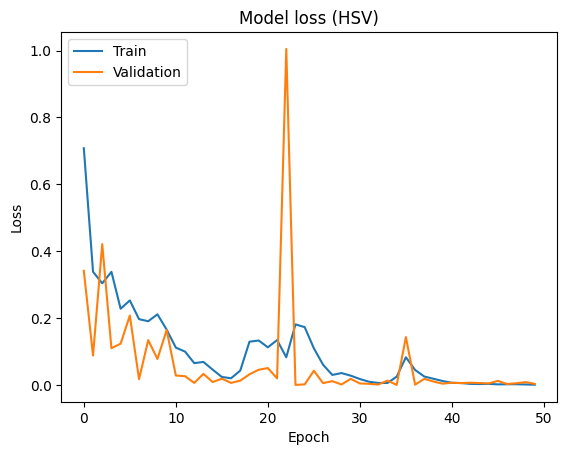

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

      matang       0.47      1.00      0.64        50
     mengkal       0.95      0.80      0.87        50
      mentah       1.00      0.04      0.08        50

    accuracy                           0.61       150
   macro avg       0.81      0.61      0.53       150
weighted avg       0.81      0.61      0.53       150



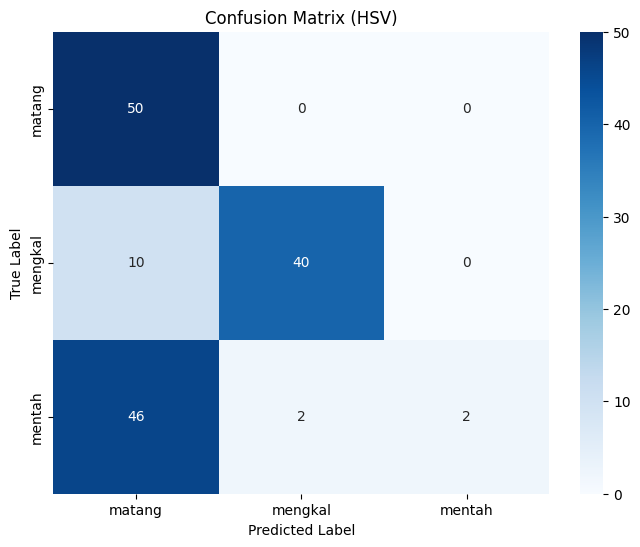

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras_tuner as kt

# Load HSV training data
train_data_hsv = pd.read_csv('C:/skripsi/coding_final/fitur_warna_tomat_HSV.csv')
test_data_hsv = pd.read_csv('C:/skripsi/coding_final/uji_fitur_warna_tomat_HSV.csv')

# Separate features and labels for training
X_train_hsv = train_data_hsv[['Mean_H', 'Mean_S', 'Mean_V', 'Std_H', 'Std_S', 'Std_V']]
y_train_hsv = train_data_hsv['Class']

# Separate features and labels for testing
X_test_hsv = test_data_hsv[['Mean_H', 'Mean_S', 'Mean_V', 'Std_H', 'Std_S', 'Std_V']]
y_test_hsv = test_data_hsv['Class']

# Encode labels
label_encoder_hsv = LabelEncoder()
y_train_encoded_hsv = label_encoder_hsv.fit_transform(y_train_hsv)
y_test_encoded_hsv = label_encoder_hsv.transform(y_test_hsv)

# Normalize features
scaler_hsv = StandardScaler()
X_train_scaled_hsv = scaler_hsv.fit_transform(X_train_hsv)
X_test_scaled_hsv = scaler_hsv.transform(X_test_hsv)

# Build model function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_dim=X_train_scaled_hsv.shape[1]))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(Dense(len(label_encoder_hsv.classes_), activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='hsv_tuning')

# Search for the best hyperparameters
tuner.search(X_train_scaled_hsv, y_train_encoded_hsv, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The best number of units in the first densely-connected layer is {best_hps.get('units')} and the best learning rate for the optimizer is {best_hps.get('learning_rate')}.")

# Build and train the model with the best hyperparameters
model_hsv = tuner.hypermodel.build(best_hps)
history_hsv = model_hsv.fit(X_train_scaled_hsv, y_train_encoded_hsv, epochs=50, validation_split=0.2)

# Evaluate the model
loss_hsv, accuracy_hsv = model_hsv.evaluate(X_test_scaled_hsv, y_test_encoded_hsv)
print(f'Accuracy HSV: {accuracy_hsv*100:.2f}%')

# Plot training & validation accuracy values
plt.plot(history_hsv.history['accuracy'])
plt.plot(history_hsv.history['val_accuracy'])
plt.title('Model accuracy (HSV)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_hsv.history['loss'])
plt.plot(history_hsv.history['val_loss'])
plt.title('Model loss (HSV)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict labels for test data
y_pred_hsv = model_hsv.predict(X_test_scaled_hsv)
y_pred_classes_hsv = np.argmax(y_pred_hsv, axis=1)

# Display classification report
print(classification_report(y_test_encoded_hsv, y_pred_classes_hsv, target_names=label_encoder_hsv.classes_))

# Create confusion matrix
conf_matrix_hsv = confusion_matrix(y_test_encoded_hsv, y_pred_classes_hsv)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hsv, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_hsv.classes_, yticklabels=label_encoder_hsv.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (HSV)')
plt.show()
